# Topic
Option 2: Implement a neural network from scratch.

Write a `NeuralNetwork` class in Python that implements a neural network model with dense layers and ReLU activation. 

This class should contain the following methods:

1. `__init__`: Declares a neural network with a list of integers indicating the size of each layer. 
2. `fit`: Trains the neural network model using the Stochastic Gradient Descent method.
3. `predict`: Calculates the output values for a list of input data.

It is up to you to decide the details, but your implementation cannot use neural network classes from any existing library. Please refer to the slides on neural networks and this online textbook for the formulas and algorithms you should use. After completing the implementation, apply the model on a dataset (for example, the Iris dataset) to see whether it gives reasonable results.

Instructions: All code should be executed, and results should be displayed in the notebook. Writing is as important as coding. Clearly describe every step that you take.

## Libraries importation

In [1]:
import numpy as np # for calculus
from pandas import read_csv  # for data loading
import matplotlib.pyplot as plt # plotting
import os # os system managment

## Description
__Full neural network construction with only math and numpy__

For this short project, I will create a fully connected two layer neural network to predict the numbers associated with the images in the MNIST data set. The network will take in the 784 pixels in an image as input. The first hidden layer will contain 10 neurons with ReLU activation, followed by a 10 neuron output layer with sigmoid activation.

Thus, to make it possible, i'll use a trainning and testing dataset form `kaggle` from __`mnist-in-csv`__.

## Test & Train data loading

In [2]:
script_dir = os.getcwd() # get the current working directory
# define the custom name and extension of train an test dataset
# in our case ext mime is csv.
train_file = "mnist_train.csv"  
test_file = "mnist_test.csv"
# compute the absolute files path
abs_train_file_path = os.path.join(script_dir, train_file)
abs_test_file_path = os.path.join(script_dir, test_file)
# load each fiile
train = read_csv(abs_train_file_path)
test = read_csv(abs_test_file_path)

### Less exploration of data to pull out somes details we said before

> show head data

In [3]:
train.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


it's there a data set of 784 pixels of different images showing a number between `0` to `9`. each row content a label which is the number show by the image and 784 pixels's value belong to it.

> show train information

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


the dataset `don't have missing values or noise values`

## Train and Test data pretreatment
in the goal of building the NN, we need to get each pixel to image as input of our first or entry layer of our NN, thus we will change the type data from `DataFrame` to `ndarray`, next transpose each dataset as modeling to be trust by the model nn. 

In [5]:
# dtype changing
train = np.array(train)
test = np.array(test)
# split train label and features before transpose the array
X_train = train[:, 1:].T
Y_train = train[:, 0].T
# split test label and features before transpose the array
X_test = test[:, 1:].T
Y_test = test[:, 0].T
# normalize each feature value to involve image computation
X_train = X_train / 255.
X_test = X_test / 255.


## CNN Logic

Our NN will have a simple two-layer architecture. 

Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image. 

A hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and 

finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

## CNN MNIST IMPLEMENTATION

In [19]:
class mnist_nn:
    """ 
    mnist neural network build from scratch within numpy, pandas and matplotlib
    
    Args:
        features (ndarray): the features content all examples features values based for train ....
        labels (ndarray): the labels content all real labels of all examples features...
        alpha (Numeric): the alpha is an update coeficient...
        iterations (Numeric): the iterations is the number of epochs of training stage...
        
    Attributes:
        features (ndarray): where store the features content all examples features values based for train ....
        labels (ndarray): where store the labels content all real labels of all examples features...
        alpha (Numeric): where store the alpha is an update coeficient...
        iterations (Numeric): where store the iterations is the number of epochs of training stage...
        w1 (ndarray): the normally randomly initialized weights from the input layer to the first hidden layer...
        b1 (ndarray): the biais from the input layers to the first hidden layer...
        w2 (ndarray): the normally randomly initialized weights from the first hidden layer to the second hidden layer...
        b2 (ndarray): the biais from the first hidden layers to the second hidden layer...
        
    """
    def __init__(self, features, labels, alpha, iterations):
        ''' Return an instance of mnist_nn with all attributes and methods '''
        self.features = features
        self.labels = labels
        self.alpha = alpha
        self.iterations = iterations
        self.size, self.m = self.features.shape
        self.W1 = np.random.normal(size=(10, self.size)) * np.sqrt(1./(self.size))
        self.b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
        self.W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
        self.b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
        self.Z1, self.A1, self.Z2, self.A2 = 0,0,0,0
        self.dW1, self.db1, self.dW2, self.db2 = 0,0,0,0
        
    def ReLU(self,Z):
        """
        ReLU method
        
        Args:
            Z (ndarray): there is a computed features
            
        Return:
            Z (ndarray) max between Zi and 0
        """
        return np.maximum(Z,0)

    def derivative_ReLU(self,Z):
        """
        derivative_ReLU method
        
        Args:
            Z (ndarray): there is a computed features
            
        Return:
            Z (ndarray) with true if zi > 0 and false else
        """
        return Z > 0

    def softmax(self,Z):
        """
        softmax method
        
        Args:
            Z (ndarray): there is a computed features
            
        Return:
            (ndarray) computed softmax values for each sets of scores in Z.
        """
        exp = np.exp(Z - np.max(Z))
        return exp / exp.sum(axis=0)

    def forward_propagation(self,X):
        """
            forward_propagation method
            
            make a propagation from input layer to output layer
        """
        self.Z1 = self.W1.dot(X) + self.b1 #10, m
        self.A1 = self.ReLU(self.Z1) # 10,m
        self.Z2 = self.W2.dot(self.A1) + self.b2 #10,m
        self.A2 = self.softmax(self.Z2) #10,m

    def one_hot(self,Y):
        ''' return an 0 vector with 1 only in the position correspondind to the value in Y'''
        one_hot_Y = np.zeros((Y.max()+1,Y.size))
        one_hot_Y[Y,np.arange(Y.size)] = 1
        return one_hot_Y

    def backward_propagation(self):
        """
            backward_propagation method
            
            computed the derivatives of forwarding process
        """
        one_hot_Y = self.one_hot(self.labels)
        self.dZ2 = 2*(self.A2 - one_hot_Y) #10,m
        self.dW2 = 1/self.m * (self.dZ2.dot(self.A1.T)) # 10 , 10
        self.db2 = 1/self.m * np.sum(self.dZ2,1) # 10, 1
        self.dZ1 = self.W2.T.dot(self.dZ2)*self.derivative_ReLU(self.Z1) # 10, m
        self.dW1 = 1/self.m * (self.dZ1.dot(self.features.T))  # 10, 784
        self.db1 = 1/self.m * np.sum(self.dZ1,1) # 10, 1

    def update_params(self):
        """
            update_params method
            
            use the the learning rate or update rate to update the weights and biais based on the above formula
        """
        self.W1 -= self.alpha * self.dW1
        self.b1 -= self.alpha * np.reshape(self.db1, (10,1))
        self.W2 -= self.alpha * self.dW2
        self.b2 -= self.alpha * np.reshape(self.db2, (10,1))
    
    def fit(self):
        """
            fit method
            
            for the number of epochs or itérations make a chain of forward, backward propagation and weights updates to try to reach the best weight of units in each layers
        """
        for i in range(self.iterations):
            self.forward_propagation(self.features)
            self.backward_propagation()
            self.update_params()
        
    def get_predictions(self):
        """
            get_predictions method
            
            To know the predicted label, use the argmax method of numpy to get the node in the output layer with the greatest value
        """
        return np.argmax(self.A2, 0)

    def make_predictions(self,X):
        """
            make_predictions method
            
            from an ndarray, try to make forward propagation in the NN and use the latest layer values of this forwarding to determine which label has been predict for each entries
        """
        self.forward_propagation(X)
        return self.get_predictions()
    
    def show_prediction(self,index, X, Y):
        """
            show_prediction method
            
            from user index, set of features and labels, use the current black box model to try to predict the label of the index element base of the vector of features belong to its
        """
        # get the vector of features to predict
        vect_X = X[:, index, None]
        # use the black box to predic
        prediction = self.make_predictions(vect_X)
        # get the target label previous to have like output
        label = Y[index]
        # show current and espected output
        print("Prediction: ", prediction)
        print("Label: ", label)
        # reshape the image to be able to plot or show
        current_image = vect_X.reshape((28, 28)) * 255
        # define the tendance background
        plt.gray()
        # set image to show with nearest interpolation
        plt.imshow(current_image, interpolation='nearest')
        # show the image
        plt.show()

## Metric Methods

In [16]:
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y)/Y.size

## RUNNER OF OUR CNN MNIST

> **MAIN EXECUTION CELL**
>
> STEPS:
> 
> - INSTANCIATE mnist_nn by given some argments to `mnist_nn(...)` such as:
>   - Training Features -> features
>   - Training Labels -> labels
>   - Update Rate -> alpha
>   - Iteration | Epoch -> iterations
> - TRAIN THE CCN mnist by calling the `fit()` method
> - Make a Prediction by sending:
>   - Test Features -> X
> - Show the prediction of the Test dataset by calling `show_prediction()`
> - Save the model we Build

In [8]:
# library for model saving
import joblib


Test Accuracy: 0.9078
Prediction:  [7]
Label:  7


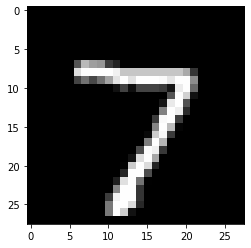

Prediction:  [2]
Label:  2


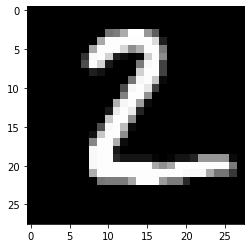

Prediction:  [1]
Label:  1


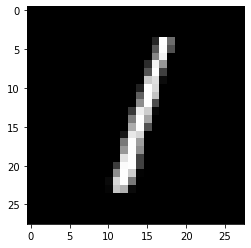

Prediction:  [0]
Label:  0


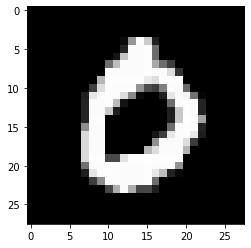

Prediction:  [4]
Label:  4


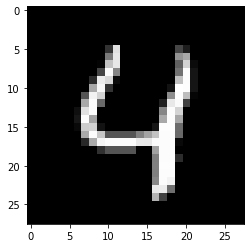

In [20]:
# instanciation
lrate = 0.15
epochs = 200
# the testing label and features was already decompose on top of this notebook as Y_train and X_train respectively 
model = mnist_nn(X_train,Y_train,lrate,epochs)

# fit the model
model.fit()

# test the model using the test label and test train name as early Y_test and X_test
predictions = model.make_predictions(X_test)

# pull out the accuracy of the model by calling our metric method get_accuracy()
acc_test = get_accuracy(predictions, Y_test)
print(f"Test Accuracy: {acc_test}")

# show the prediction of 5 first element in X_test
for i in range(5):
    model.show_prediction(i, X_test, Y_test)


In [21]:
# save knn model
joblib.dump(model, 'mnist_nn.pkl')

['mnist_nn.pkl']

In [22]:
# load knn models
mnist_nn_model = joblib.load('mnist_nn.pkl', mmap_mode='r')


Prediction:  [7]
Label:  7


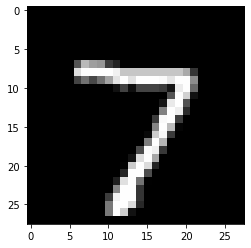

Prediction:  [2]
Label:  2


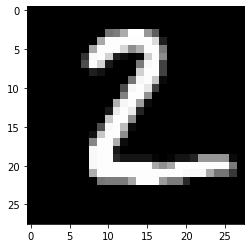

Prediction:  [1]
Label:  1


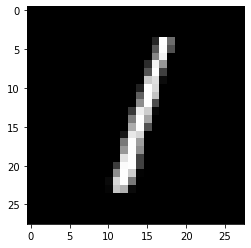

Prediction:  [0]
Label:  0


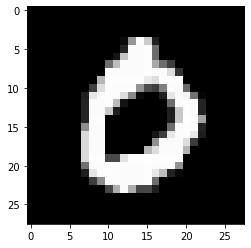

Prediction:  [4]
Label:  4


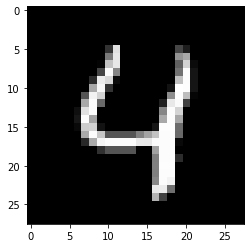

In [23]:
# show the prediction of 5 first element in X_test on the load model
for i in range(5):
    mnist_nn_model.show_prediction(i, X_test, Y_test)
